# Assignment 4: Benchmarking Fashion-MNIST with ANN

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
"The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." - **Zalando Research, Github Repo.**"

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![Here's an example how the data looks (each class takes three-rows):](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In this assignment, you will attempt to benchmarking the Fashion-MNIST using ANNs. You must use it to train some neural networks on TensorFlow and predict the final output of 10 classes. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (20 pts)

You can load the Fashion MNIST directly from Tensorflow using the folliwng code:
    tf.keras.datasets.fashion_mnist.load_data();

Write some code to load the data file and take a quick look at the dataset, and output the following:
- How big is your dataset? (regarding MB)
- How many entries does it have?
- How many features does it have?
- What are some basic statistics you can learn right away about this dataset?

**Large-scale Visualization:** Demonstrate that this dataset is indeed a complex and high dimensional worthy of an attempt on TensorFlow. Again, is there any non-linearly separation among the classes? Discover and plot out all features among the features.

In [1]:
# You might want to use the following package
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from tensorflow import keras
from tensorflow.python.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
# Your code goes here for this section.
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data();

def load_data(dir_path, filename):
    csv_path = os.path.join(dir_path, filename)
    return pd.read_csv(csv_path)

data_train = load_data("", "fashion-mnist_train.csv")
data_test = load_data("", "fashion-mnist_test.csv")

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = np.array(data_train.iloc[:, 0])

#Here we split validation data to optimize classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

#Normalizing the data from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Dataset Description

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [4]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Size: The training and test data combined is 420 MB.  
- Entries: There are 60000 entries in the training set and 10000 entries in the test set.  
- Features: Every image of size 28x28. Hence, there are 784 features which with each pixel's grayscale value (0-255) being a feature.

### Classes

There are a total of 10 classes. The following are the classes:  
0: T-shirt/top  
1: Trouser  
2: Pullover  
3: Dress  
4: Coat  
5: Sandal  
6: Shirt  
7: Sneaker  
8: Bag  
9: Ankle boot

### Dataset Statistics

In [6]:
data_train["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [7]:
data_test["label"].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

The training set has 6000 examples per class and the test set has 1000 examples per class. Generating a correlation matrix does not make sense because, each feature is a pixel value and the linear relationship between a pixel value to the class label does not mean much.

### Correlation for the test data

In [20]:
corr_matrix = data_test.corr()
corr_matrix["label"].sort_values(ascending=False)

label       1.000000
pixel446    0.656260
pixel418    0.654991
pixel390    0.653649
pixel474    0.650405
pixel362    0.641375
pixel445    0.641242
pixel417    0.638432
pixel473    0.637982
pixel389    0.633631
pixel502    0.627699
pixel334    0.616447
pixel361    0.614095
pixel530    0.613793
pixel475    0.609338
pixel501    0.609072
pixel558    0.602845
pixel447    0.602184
pixel503    0.598707
pixel531    0.593730
pixel529    0.593575
pixel559    0.581342
pixel419    0.580998
pixel444    0.576054
pixel416    0.572238
pixel557    0.571772
pixel472    0.570765
pixel333    0.564418
pixel388    0.563555
pixel586    0.559652
              ...   
pixel180   -0.571493
pixel181   -0.574904
pixel127   -0.584105
pixel154   -0.585681
pixel72    -0.587819
pixel99    -0.588628
pixel71    -0.597346
pixel153   -0.597365
pixel152   -0.597782
pixel98    -0.600645
pixel126   -0.603635
pixel70    -0.603859
pixel151   -0.604982
pixel44    -0.607504
pixel69    -0.607552
pixel125   -0.607614
pixel42    -0

### Visualization

This is how a training example looks like:

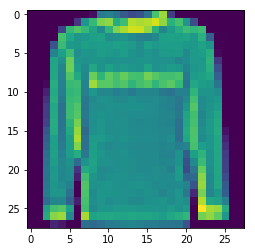

In [8]:
image = X_train[308,:].reshape((28,28))
plt.imshow(image)
plt.show()

- - -
## 2. CONSTRUCTION PHASE (25 pts)

Define at least three networks with different structures: Ensure the input layer has the right number of inputs. The best structure often is found through a process of trial and error experimentation:
- You may start with a fully connected network structure with two hidden layers.
- You may try a few activation functions to see if they affect the performance.
- You may use various optimizers to tweak the model parameters to minimize the cost function.

### Model 1: ANN

In [9]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
model_1 = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model_1.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Model 2: ANN

In [10]:
model_2 = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation=tf.nn.relu),
    Dense(512, activation=tf.nn.relu),
    Dense(512, activation=tf.nn.relu),
    Dense(512, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model_2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


### Model 3: CNN

In [11]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model_3 = keras.Sequential([
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_3.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

- - -
## 3. EXECUTION PHASE (30 pts)

For each of the three models of your neural networks, open a TensorFlow session, define the number of epochs and size of the training batch (20 pts): For each model, you must compute the performance measures: Confusion Matrix and Class Accuracy.
- Which one yields the best performance measure for your dataset?
- You must be able to save the trained model and load it from disk to evaluate a test set


### Epochs and Batch Size

In [12]:
model_batch_size = 256
model1_epochs = 15
model2_epochs = 15
model3_epochs = 15

### Training

In [13]:
m1_history = model_1.fit(X_train, y_train,
                         batch_size=model_batch_size,
                         epochs=model1_epochs,
                         verbose=1,
                         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1s 25us/step - loss: 0.6379 - acc: 0.7797 - val_loss: 0.4683 - val_acc: 0.8356
Epoch 2/15
48000/48000 [==============================] - 1s 14us/step - loss: 0.4246 - acc: 0.8500 - val_loss: 0.4125 - val_acc: 0.8524
Epoch 3/15
48000/48000 [==============================] - 1s 14us/step - loss: 0.3808 - acc: 0.8654 - val_loss: 0.3806 - val_acc: 0.8652
Epoch 4/15
48000/48000 [==============================] - 1s 14us/step - loss: 0.3502 - acc: 0.8767 - val_loss: 0.3611 - val_acc: 0.8727
Epoch 5/15
48000/48000 [==============================] - 1s 13us/step - loss: 0.3290 - acc: 0.8819 - val_loss: 0.3524 - val_acc: 0.8704
Epoch 6/15
48000/48000 [==============================] - 1s 13us/step - loss: 0.3085 - acc: 0.8879 - val_loss: 0.3410 - val_acc: 0.8747
Epoch 7/15
48000/48000 [==============================] - 1s 14us/step - loss: 0.2970 - acc: 0.8924 - val_loss: 0.3302 - val_acc

In [14]:
m2_history = model_2.fit(X_train, y_train,
                         batch_size=model_batch_size,
                         epochs=model2_epochs,
                         verbose=1,
                         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 86us/step - loss: 0.5470 - acc: 0.8033 - val_loss: 0.4208 - val_acc: 0.8446
Epoch 2/15
48000/48000 [==============================] - 4s 88us/step - loss: 0.3683 - acc: 0.8642 - val_loss: 0.3769 - val_acc: 0.8652
Epoch 3/15
48000/48000 [==============================] - 4s 76us/step - loss: 0.3283 - acc: 0.8800 - val_loss: 0.3580 - val_acc: 0.8703
Epoch 4/15
48000/48000 [==============================] - 4s 79us/step - loss: 0.3046 - acc: 0.8886 - val_loss: 0.3321 - val_acc: 0.8805
Epoch 5/15
48000/48000 [==============================] - 4s 89us/step - loss: 0.2914 - acc: 0.8924 - val_loss: 0.3314 - val_acc: 0.8753
Epoch 6/15
48000/48000 [==============================] - 4s 82us/step - loss: 0.2728 - acc: 0.8977 - val_loss: 0.3115 - val_acc: 0.8856
Epoch 7/15
48000/48000 [==============================] - 4s 80us/step - loss: 0.2530 - acc: 0.9050 - val_loss: 0.3289 - val_acc

In [15]:
m3_history = model_3.fit(X_train, y_train,
                         batch_size=model_batch_size,
                         epochs=model3_epochs,
                         verbose=1,
                         validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 40s 828us/step - loss: 0.7804 - acc: 0.7115 - val_loss: 0.4539 - val_acc: 0.8352
Epoch 2/15
48000/48000 [==============================] - 41s 848us/step - loss: 0.4832 - acc: 0.8237 - val_loss: 0.3896 - val_acc: 0.8604
Epoch 3/15
48000/48000 [==============================] - 41s 861us/step - loss: 0.4251 - acc: 0.8465 - val_loss: 0.3490 - val_acc: 0.8739
Epoch 4/15
48000/48000 [==============================] - 41s 862us/step - loss: 0.3920 - acc: 0.8561 - val_loss: 0.3311 - val_acc: 0.8827
Epoch 5/15
48000/48000 [==============================] - 42s 868us/step - loss: 0.3701 - acc: 0.8672 - val_loss: 0.3095 - val_acc: 0.8893
Epoch 6/15
48000/48000 [==============================] - 42s 874us/step - loss: 0.3539 - acc: 0.8709 - val_loss: 0.3062 - val_acc: 0.8906
Epoch 7/15
48000/48000 [==============================] - 39s 815us/step - loss: 0.3370 - acc: 0.8774 - val_loss: 0.

### Model Performance

In [16]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,class_,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

_, model_1_acc = model_1.evaluate(X_test, y_test)
_, model_2_acc = model_2.evaluate(X_test, y_test)
_, model_3_acc = model_3.evaluate(X_test, y_test)

predictions_model_1 = model_1.predict_classes(X_test, verbose=0)
predictions_model_2 = model_2.predict_classes(X_test, verbose=0)
predictions_model_3 = model_3.predict_classes(X_test, verbose=0)

classes_fashion = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']

10000/10000 [==============================] - 1s 140us/step


#### Model1

Model 1 accuracy: 87.92


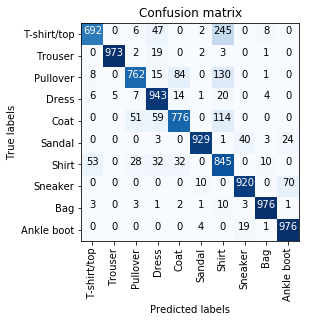

In [17]:
print('Model 1 accuracy:', model_1_acc*100)
plot_confusion_matrix(confusion_matrix(y_test, predictions_model_1), classes_fashion)

#### Model 2

Model 2 accuracy: 89.42


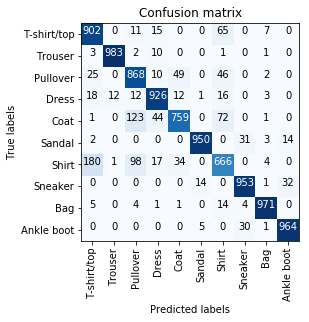

In [18]:
print('Model 2 accuracy:', model_2_acc*100)
plot_confusion_matrix(confusion_matrix(y_test, predictions_model_2), classes_fashion)

#### Model 3

Model 3 accuracy: 91.24


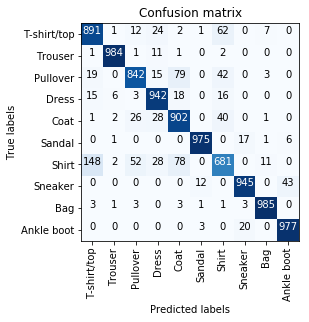

In [19]:
print('Model 3 accuracy:', model_3_acc*100)
plot_confusion_matrix(confusion_matrix(y_test, predictions_model_3), classes_fashion)

- - -
## 4. FINETUNING THE NETWORK (20 pts)

You may be able to compare the performance of your method agaist other ML methods below:
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com

To improve the performance of your ANN, you can use grid search with cross-validation to find the right set of hyperparameters, but that would take a lot of times (days, sometimes weeks). Therefore, you must make some decision of which reasonable values for each hyperparameter, so that you can restrict the search space. Here's a few decision about the network you have to made and justify:

- The number of hidden layers. Why did you pick this many?
- The number of neurons per hidden layers. Provide some justifiable reasons
- Which activation functions need to be used? Why?



### Number of hidden layers and neurons

For Model 1 and Model 2, I tried out different combinations of hidden layers - 2, 3, and 4 with 128, 256, and 512 neurons. And found that 128 x 2 and 512 x 4 are the reasonable accuracy with not too high a training time.

For Model 3, I tried out CNN with different variations of convolutional and pooling layers and finally picked one that was giving an accuracy of more than 90%.

### Activation Function

I tried ReLu and ELU as the activation functions. There was better performance wiht ReLu. Also, the other activation functions like Sigmoid and tanh suffer from Vanishing Gradient problem. Hence, I decided to go with ReLu for the hidden layers and Softmax for the output layer.

- - -
## 5. OUTLOOK (5 pts)

Plan for the outlook of your system: This will lead to the direction of your future project:
- Did your neural network outperform other "traditional ML technique? Why/why not?
- Does your model work well for the future? If not, which model should be further investigated?
- Do you satisfy with your system? What do you think needed to improve?



- The CNN model did outperform the SVC model which had the best performance in the charts. 

- The model works reasonably well with a 91.24% accuracy. However, some data augmentation in CNN for rotation, horizontal flip and fill mode will improve the accuracy better.

- Overall, I'm happy that the system performs better than other supervised algorithms. But, I believe that if the number of epochs are increased, this CNN model itself can get increased performance.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 3:...".
 * More on the Fashion-MNIST to be found here: https://hanxiao.github.io/2018/09/28/Fashion-MNIST-Year-In-Review/

Best of luck and have fun!